<a href="https://colab.research.google.com/github/Meyyaou/pythondaily/blob/main/STEP4-Webscrape/webscrape_project_(minione).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#import all tools
from bs4 import BeautifulSoup
import requests
import pandas as pd
import lxml
import re

In [28]:
#url="https://www.amazon.fr/s?rh=n%3A302004%2Cp_72%3A4-&content-id=amzn1.sym.6dd8bd97-fb7f-4645-b144-27f8255dbcd8&pd_rd_r=adfe474f-e4a1-4cdd-b4f5-8f9b5bf26580&pd_rd_w=QVxJ8&pd_rd_wg=TnXxt&pf_rd_p=6dd8bd97-fb7f-4645-b144-27f8255dbcd8&pf_rd_r=F16SHWEG7V4Z3YQ0W5B6&ref=Oct_d_otopr_S"
#url="https://51.158.55.107/__cpi.php?s=UkQ2YXlSaWJuc3ZoeGR2dG04WW9LbFJkeHh2akJybnZ4ckljU3dzejI5Tk1CZk1mY000cHovenV6WG83V0pTN0gwUTNsYlVJYWJZeTZaaGZ3YlM0Z2cxZHppMm40RmhIVHhQdTVzRXpFWms9&r=aHR0cHM6Ly81MS4xNTguNTUuMTA3L3M%2Faz1saXZyZSZpPXN0cmlwYm9va3Mmcmg9biUzQTMwMTA2MSUyQ24lM0EzMDIwMDQmcz1leGFjdC1hd2FyZS1wb3B1bGFyaXR5LXJhbmsmZGMmcWlkPTE3MjA3NDU1NzYmcm5pZD0zMDEwNjEmcmVmPXNyX3N0X2V4YWN0LWF3YXJlLXBvcHVsYXJpdHktcmFuayZkcz12MSUzQWVOOWlaNzExUXI2U2trR25BTVpkeEhOZ3BjZFhJcGRpTk5ueG05bCUyQlZ5SSZfX2Nwbz1hSFIwY0hNNkx5OTNkM2N1WVcxaGVtOXVMbVp5&__cpo=1"

In [25]:
page=requests.get(url)
page

<Response [200]>

'<!DOCTYPE html>\n<html>\n    <head>\n        <title>Proxy is launching...</title>\n        <meta name="viewport" content="width=device-width, initial-scale=1.0">\n        <meta name="frontPassport" content="66907f0274aec" />\n        <style>\n            * {\n                outline: 0;\n                padding: 0;\n                margin: 0;\n                border: 0;\n            }\n            *, *:before, *:after {\n                box-sizing: inherit;\n            }\n            table {\n                border-collapse: collapse;\n                border-spacing: 0;\n            }\n            html, body {\n                box-sizing: border-box;\n                font: normal 16px sans-serif;\n                color: #111111;\n                height: 100%;\n                width: 100%;\n                margin: 0;\n                padding: 0;\n            }\n            body {\n                background: url("") repeat;\n            }\n            p {\n                margin: 30px
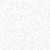

In [15]:
content=page.text
content

In [16]:
soup=BeautifulSoup(content, 'lxml')

'<!DOCTYPE html>\n<html>\n <head>\n  <title>\n   Proxy is launching...\n  </title>\n  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>\n  <meta content="66907f0274aec" name="frontPassport"/>\n  <style>\n   * {\n                outline: 0;\n                padding: 0;\n                margin: 0;\n                border: 0;\n            }\n            *, *:before, *:after {\n                box-sizing: inherit;\n            }\n            table {\n                border-collapse: collapse;\n                border-spacing: 0;\n            }\n            html, body {\n                box-sizing: border-box;\n                font: normal 16px sans-serif;\n                color: #111111;\n                height: 100%;\n                width: 100%;\n                margin: 0;\n                padding: 0;\n            }\n            body {\n                background: url("") repeat;\n            }\n            p {\n                margin: 30px 0;\n            }\n       
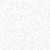

In [17]:
#to get readable html post parsing
soup.prettify()

In [24]:
#tronquer what we dont need!
for header in soup.find_all('header'):
  header.decompose()
#soup.find('div', class_='navLeftFooter').decompose()
soup.find_all('div', class_='navLeftFooter')
#soup.find('div', class_='rhf-frame').decompose()
#soup.find('div', class_='copilot-secure-display').decompose()

[]

In [26]:
#get the title
titles=[]
pattern =re.compile(r'\d+')

for title in soup.find_all('span', class_='a-text-normal'):
  if not pattern.match(title.string):
    titles.append(title.string)
    title
titles

[]

In [27]:
#get auteur
auteurs=[]

for auteur in soup.find_all('span', class_='a-size-base'):
  auteurs.append(auteur.string)
auteurs


[]

In [ ]:
#get date de sortie

In [ ]:
#get price

In [ ]:
#get price livraison

In [ ]:
#get price kindle

In [ ]:
#get ordre dans le top!

In [ ]:
#DATA ANALYSIS

In [ ]:
#email stuff doesnt work for gmail
import smtplib
from email.message import EmailMessage

In [ ]:
senderEmail='sender@gmail.com'
recieverEmail = 'reciever@gmail.com'
password = input(str("please enter your pswd: "))
msg= "hey that's a quick test lol !"
server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
server.ehlo()
server.login(senderEmail, password)
print('login successful!')
server.sendmail(senderEmail, recieverEmail, msg)
print("email has been sent to reciever")
server.close()

KeyboardInterrupt: Interrupted by user